## Basic diagnostics

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
from xhistogram.xarray import histogram
import pandas as pd

In [2]:
import cosima_cookbook as cc

In [3]:
session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_1.db')

In [4]:
cc.querying.get_experiments(session)

,experiment,ncfiles
0,1deg_jra55_ryf_rcpwarm,710
1,1deg_jra55_ryf_rcpcool,286
2,1deg_jra55_ryf_rcpcont,710
3,1deg_jra55_ryf_red3DSK_C9,12644
4,1deg_jra55_ryf_RCPcool,570
5,1deg_jra55_ryf_RCPwarmhumid,840
6,1deg_jra55_ryf_RCPcont,840
7,1deg_jra55_ryf_RCPwarmhumid2x,840
8,1deg_jra55_ryf_RCPcoolhumid,840
9,1deg_jra55_ryf_RCPcoolhumid2x,840


Loading variables

In [5]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
variable = 'temp_global_ave'
darray_warm = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
darray_warm
annual_average_warm = darray_warm.groupby('time.year').mean(dim='time')
darray_swarm = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_swarm = darray_swarm.groupby('time.year').mean(dim='time')
temp_warm = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_warm = temp_warm.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_warm = cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_warm = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_warm = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_warm = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_warm = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_warm = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_warm = cc.querying.getvar(expt,'area_t',session, n=-1)
SST_warm = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)


In [6]:
expt = '1deg_jra55_ryf_RCPwarmhumid2x'
variable = 'temp_global_ave'
darray_warm2x = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_warm2x = darray_warm2x.groupby('time.year').mean(dim='time')
darray_swarm2x = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_swarm2x = darray_swarm2x.groupby('time.year').mean(dim='time')
temp_warm2x = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_warm2x = temp_warm2x.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_warm2x = cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_warm2x = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_warm2x = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_warm2x = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_warm2x = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_warm2x = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_warm2x = cc.querying.getvar(expt,'area_t',session, n=-1)
SST_warm2x = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)


In [7]:
expt = '1deg_jra55_ryf_RCPcoolhumid'
variable = 'temp_global_ave'
darray_cool = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cool = darray_cool.groupby('time.year').mean(dim='time')
darray_scool = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scool = darray_scool.groupby('time.year').mean(dim='time')
temp_cool = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cool = temp_cool.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_cool= cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_cool = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_cool = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_cool = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_cool = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_cool = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_cool = cc.querying.getvar(expt,'area_t',session, n=-1)
SST_cool = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)


In [8]:
expt = '1deg_jra55_ryf_RCPcoolhumid2x'
variable = 'temp_global_ave'
darray_cool2x = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cool2x = darray_cool2x.groupby('time.year').mean(dim='time')
darray_scool2x = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scool2x = darray_scool2x.groupby('time.year').mean(dim='time')
temp_cool2x = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cool2x = temp_cool2x.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_cool2x= cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_cool2x = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_cool2x = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_cool2x = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_cool2x = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_cool2x = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_cool2x = cc.querying.getvar(expt,'area_t',session, n=-1)
SST_cool2x = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)


In [9]:
expt = '1deg_jra55_ryf_RCPcont'
variable = 'temp_global_ave'
darray_cont = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cont = darray_cont.groupby('time.year').mean(dim='time')
darray_scont = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scont = darray_scont.groupby('time.year').mean(dim='time')
temp_cont = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cont = temp_cont.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_cont= cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_cont = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_cont = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_cont = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_cont = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
salt_cont = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_cont = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_cont= cc.querying.getvar(expt,'area_t',session, n=-1)
SST_cont = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)


In [10]:
expt = '1deg_jra55_ryf_red3DSK_C9'
variable = 'temp_global_ave'
darray_windup = cc.querying.getvar(expt, variable, session,ncfile='ocean_scalar.nc')
annual_average_windup = darray_windup.groupby('time.year').mean(dim='time')
darray_swindup = cc.querying.getvar(expt, 'temp_surface_ave', session,ncfile='ocean_scalar.nc')
annual_average_swindup = darray_swindup.groupby('time.year').mean(dim='time')

In [11]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

cc.querying.get_variables(session, experiment='1deg_jra55_ryf_RCPcont', frequency='1 monthly')

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
0,ANGLE,angle grid makes with latitude line on U grid,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
1,ANGLET,angle grid makes with latitude line on T grid,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
2,HTE,T cell width on East side,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
3,HTN,T cell width on North side,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
4,NCAT,category maximum thickness,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
5,TLAT,T grid center latitude,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
6,TLON,T grid center longitude,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
7,Tair_m,air temperature,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
8,Tsfc_m,snow/ice surface temperature,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00
9,ULAT,U grid center latitude,1 monthly,output104/ice/OUTPUT/iceh.2949-12.nc,720,2890-01-01 00:00:00,2950-01-01 00:00:00


Plotting annual average temperature

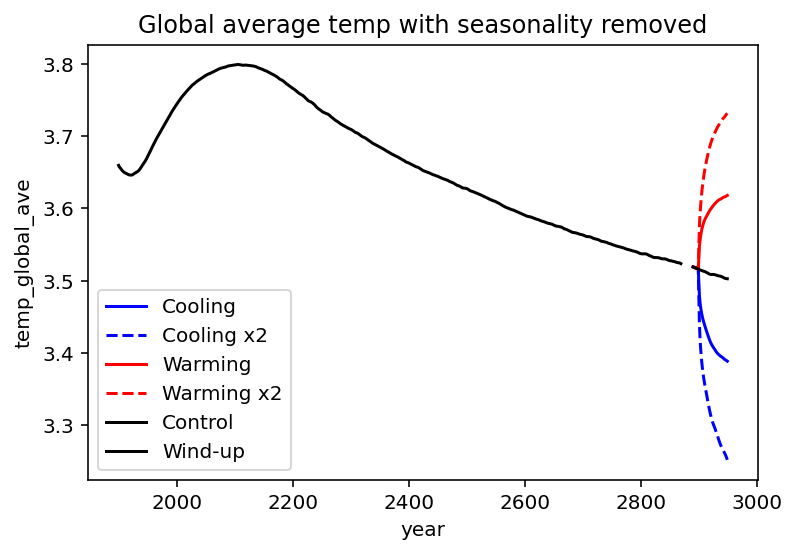

In [18]:
annual_average_cool.plot(label='Cooling', color = 'b')
annual_average_cool2x.plot(label='Cooling x2', color = 'b',linestyle='--')
annual_average_warm.plot(label='Warming', color = 'r')
annual_average_warm2x.plot(label='Warming x2', color = 'r',linestyle='--')

annual_average_cont.plot(label='Control',color = 'k')
annual_average_windup.plot(label='Wind-up',color = 'k')

plt.legend()
plt.title('Global average temp with seasonality removed')
plt.savefig('figures/windup')

Text(0.5, 1.0, 'Anomalies of global average sea temperature')

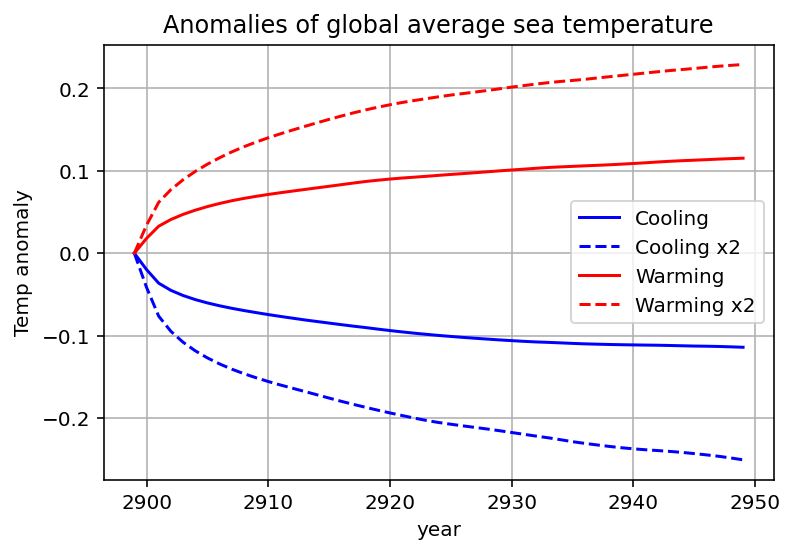

In [12]:
(annual_average_cool-annual_average_cont).sel(year = slice(2899,2949)).plot(label='Cooling',color = 'b')
(annual_average_cool2x-annual_average_cont).sel(year = slice(2899,2949)).plot(label='Cooling x2',color = 'b', linestyle = '--')
(annual_average_warm-annual_average_cont).sel(year = slice(2899,2949)).plot(label='Warming', color = 'r')
(annual_average_warm2x-annual_average_cont).sel(year = slice(2899,2949)).plot(label='Warming x2',color = 'r', linestyle = '--')
plt.legend()
plt.grid()
plt.ylabel('Temp anomaly')
plt.title('Anomalies of global average sea temperature')

Text(0.5, 1.0, 'Anomalies of global average sea surface temperature')

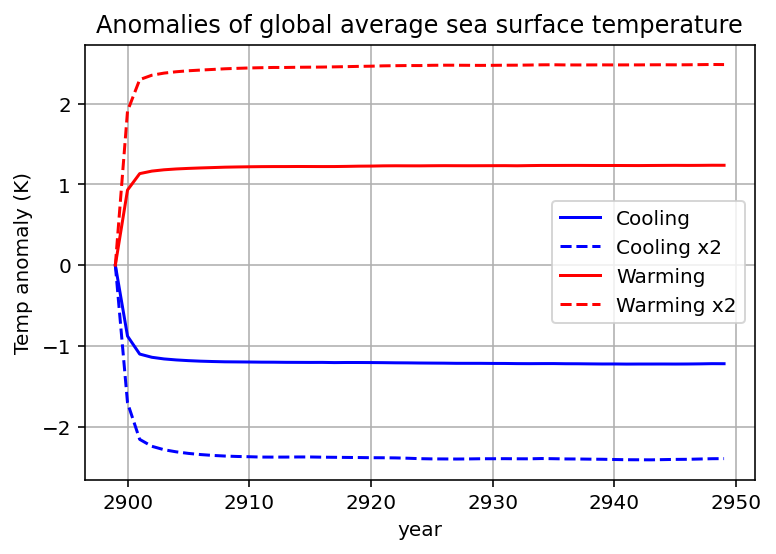

In [13]:
(annual_average_scool-annual_average_scont).sel(year = slice(2899,2949)).plot(label='Cooling',color = 'b')
(annual_average_scool2x-annual_average_scont).sel(year = slice(2899,2949)).plot(label='Cooling x2',color = 'b', linestyle = '--')
(annual_average_swarm-annual_average_scont).sel(year = slice(2899,2949)).plot(label='Warming', color = 'r')
(annual_average_swarm2x-annual_average_scont).sel(year = slice(2899,2949)).plot(label='Warming x2',color = 'r', linestyle = '--')
plt.legend()
plt.grid()
plt.ylabel('Temp anomaly (K)')
plt.title('Anomalies of global average sea surface temperature')

Text(0.5, 1.0, 'Global average sea surface temperature')

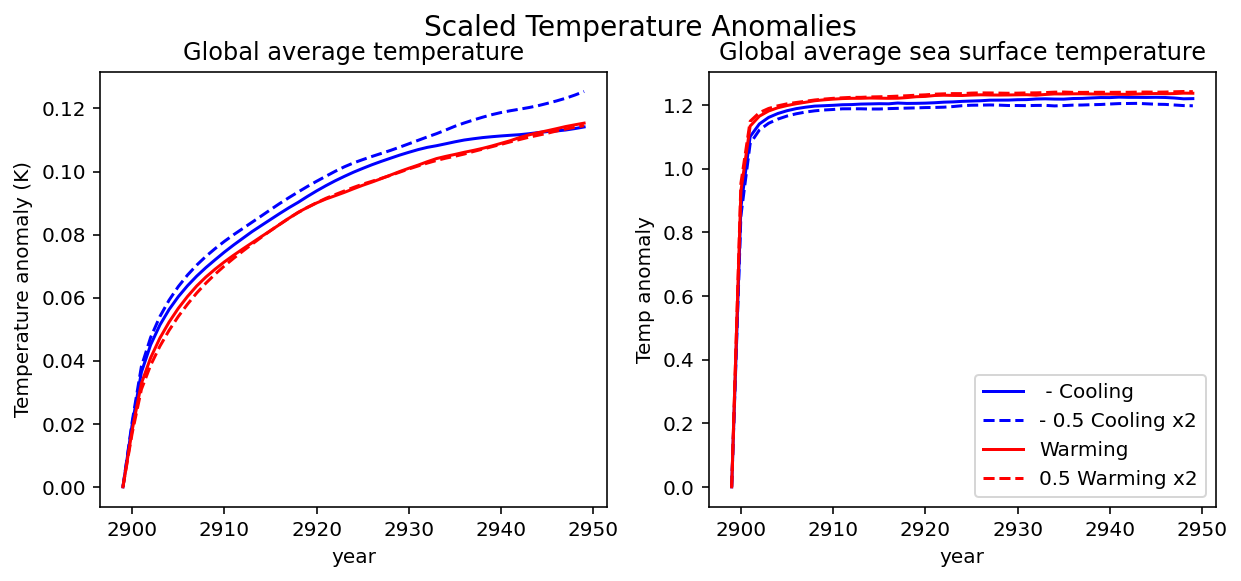

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (10,4))
plt.suptitle('Scaled Temperature Anomalies', fontsize = 14)

((annual_average_cool*(-1)-annual_average_cont*(-1)).sel(year = slice(2899,2949))).plot(label=' - Cooling',color = 'b', ax = axes[0])
((annual_average_cool2x*(-0.5)-annual_average_cont*(-0.5)).sel(year = slice(2899,2949))).plot(label='- 0.5 Cooling x2',color = 'b', linestyle = '--', ax = axes[0])
(annual_average_warm-annual_average_cont).sel(year = slice(2899,2949)).plot(label='Warming', color = 'r', ax = axes[0])
((annual_average_warm2x*0.5-annual_average_cont*0.5).sel(year = slice(2899,2949))).plot(label='0.5 Warming x2',color = 'r', linestyle = '--', ax = axes[0])
((annual_average_scool*(-1)-annual_average_scont*(-1)).sel(year = slice(2899,2949))).plot(label=' - Cooling',color = 'b', ax = axes[1])
((annual_average_scool2x*(-0.5)-annual_average_scont*(-0.5)).sel(year = slice(2899,2949))).plot(label='- 0.5 Cooling x2',color = 'b', linestyle = '--', ax = axes[1])
(annual_average_swarm-annual_average_scont).sel(year = slice(2899,2949)).plot(label='Warming', color = 'r', ax = axes[1])
((annual_average_swarm2x*0.5-annual_average_scont*0.5).sel(year = slice(2899,2949))).plot(label='0.5 Warming x2',color = 'r', linestyle = '--', ax = axes[1])
axes[1].legend()

axes[0].set_ylabel('Temperature anomaly (K)')
axes[1].set_ylabel('Temp anomaly')
axes[0].set_title('Global average temperature')
axes[1].set_title('Global average sea surface temperature')

#plt.savefig('figures/scaledtemp')

Zonal average of surface flux

In [10]:
variable_to_average = (surface_heat_flux_warm -surface_heat_flux_cont).isel(year= np.arange(9,59))#cc.querying.getvar(expt, 'net_sfc_heating', session)
coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
expt = '1deg_jra55_ryf_RCPwarmhumid'
variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer
yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 
dzt = cc.querying.getvar(expt, 'dzt', session, ncfile='ocean.nc')#.isel(time= np.arange(0,20)) #thickness of cells
dzt_monthly = xr.DataArray(dzt.isel(st_ocean = 0).values, dims=['year','yt_ocean','xt_ocean'],
                           coords={'year': variable_to_average.year,
                                   'yt_ocean':dzt.yt_ocean,
                                   'xt_ocean': dzt.xt_ocean})
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
dVol = (dzt_monthly*area_t) #Volume of cells

histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
coord_mean_warm = (histTVolCoordDepth/histVolCoordDepth)#.groupby('time.year').sum(dim='time')

In [11]:
variable_to_average = (surface_heat_flux_warm2x -surface_heat_flux_cont).isel(year= np.arange(9,59))#cc.querying.getvar(expt, 'net_sfc_heating', session)
coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
expt = '1deg_jra55_ryf_RCPwarmhumid2x'
variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer
yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 
dzt = cc.querying.getvar(expt, 'dzt', session, ncfile='ocean.nc')#.isel(time= np.arange(0,20)) #thickness of cells
dzt_monthly = xr.DataArray(dzt.isel(st_ocean = 0).values, dims=['year','yt_ocean','xt_ocean'],
                           coords={'year': variable_to_average.year,
                                   'yt_ocean':dzt.yt_ocean,
                                   'xt_ocean': dzt.xt_ocean})
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
dVol = (dzt_monthly*area_t) #Volume of cells

histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
coord_mean_warm2x = (histTVolCoordDepth/histVolCoordDepth)#.groupby('time.year').sum(dim='time')

In [12]:
variable_to_average = (surface_heat_flux_cool -surface_heat_flux_cont).isel(year= np.arange(9,59))#cc.querying.getvar(expt, 'net_sfc_heating', session)
coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
expt = '1deg_jra55_ryf_RCPcoolhumid'
variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer
yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 
dzt = cc.querying.getvar(expt, 'dzt', session, ncfile='ocean.nc')#.isel(time= np.arange(0,20)) #thickness of cells
dzt_monthly = xr.DataArray(dzt.isel(st_ocean = 0).values, dims=['year','yt_ocean','xt_ocean'],
                           coords={'year': variable_to_average.year,
                                   'yt_ocean':dzt.yt_ocean,
                                   'xt_ocean': dzt.xt_ocean})
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
dVol = (dzt_monthly*area_t) #Volume of cells

histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
coord_mean_cool = (histTVolCoordDepth/histVolCoordDepth)#.groupby('time.year').sum(dim='time')

In [13]:
variable_to_average = (surface_heat_flux_cool2x -surface_heat_flux_cont).isel(year= np.arange(9,59))#cc.querying.getvar(expt, 'net_sfc_heating', session)
coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
expt = '1deg_jra55_ryf_RCPcoolhumid2x'
variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer
yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 
dzt = cc.querying.getvar(expt, 'dzt', session, ncfile='ocean.nc')#.isel(time= np.arange(0,20)) #thickness of cells
dzt_monthly = xr.DataArray(dzt.isel(st_ocean = 0).values, dims=['year','yt_ocean','xt_ocean'],
                           coords={'year': variable_to_average.year,
                                   'yt_ocean':dzt.yt_ocean,
                                   'xt_ocean': dzt.xt_ocean})
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
dVol = (dzt_monthly*area_t) #Volume of cells

histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
coord_mean_cool2x = (histTVolCoordDepth/histVolCoordDepth)#.groupby('time.year').sum(dim='time')

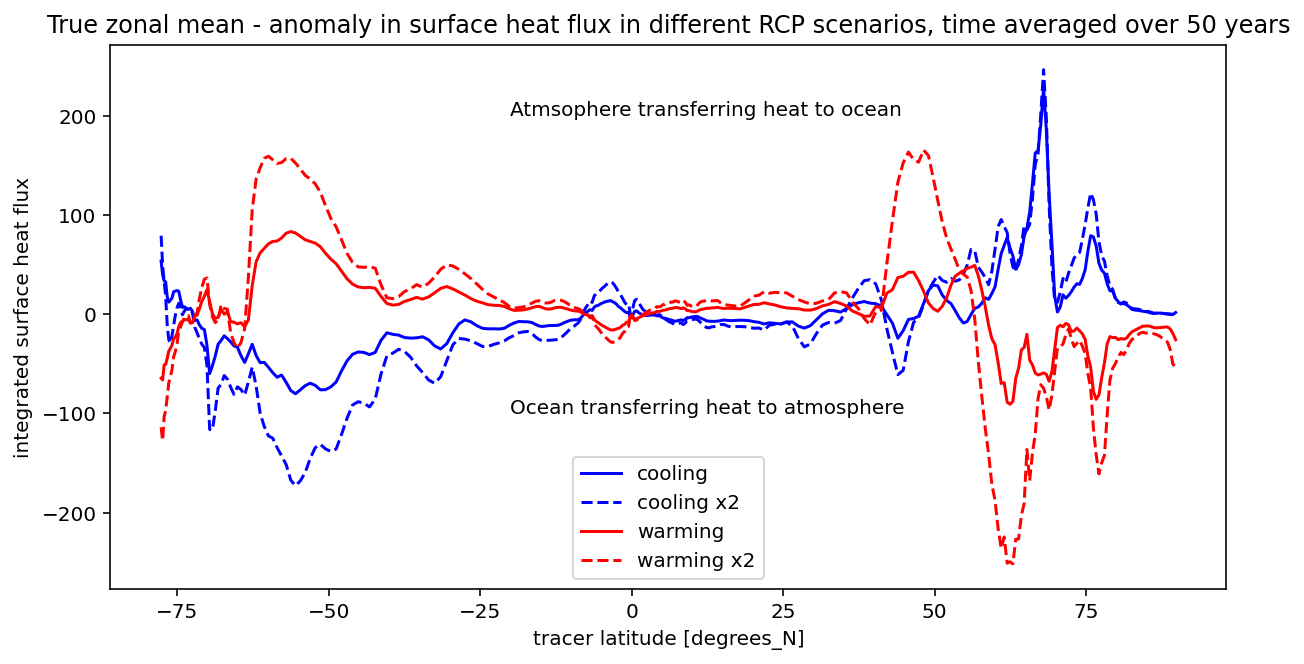

In [16]:
plt.figure(figsize=(10, 5))
coord_mean_cool.mean('year').plot(label = 'cooling', color = 'b')
coord_mean_cool2x.mean('year').plot(label = 'cooling x2', color = 'b', linestyle = '--')

coord_mean_warm.mean('year').plot(label = 'warming', color = 'r')
coord_mean_warm2x.mean('year').plot(label = 'warming x2', color = 'r', linestyle = '--')

plt.title('True zonal mean - anomaly in surface heat flux in different RCP scenarios, time averaged over 50 years');
plt.legend()
plt.ylabel('integrated surface heat flux')
plt.text(-20,200,'Atmsophere transferring heat to ocean')
plt.text(-20,-100,'Ocean transferring heat to atmosphere')
plt.savefig('figures/surfzonal')

Vertically integrated heat anomaly

In [11]:
rho_0 = 1030#kg/m^3
c_p = 3992 #J/kg/K


In [12]:
expt = '1deg_jra55_ryf_RCPcont'
variable1 = 'temp'
darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
variable2 = 'dzt'
darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
variable3 = 'area_t'
darray3 = cc.querying.getvar(expt, variable3, session,n=1)
vertically_integrated_heat_cont = (rho_0*c_p*darray1*darray2).sum('st_ocean')

In [13]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
variable1 = 'temp'
darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
variable2 = 'dzt'
darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
variable3 = 'area_t'
darray3 = cc.querying.getvar(expt, variable3, session,n=1)
vertically_integrated_heat_warm = (rho_0*c_p*darray1*darray2).sum('st_ocean')

variable_to_average = (vertically_integrated_heat_warm -vertically_integrated_heat_cont).isel(time= np.arange(0,50))#cc.querying.getvar(expt, 'net_sfc_heating', session)
coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
expt = '1deg_jra55_ryf_RCPwarmhumid'
variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer
yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 
dzt = cc.querying.getvar(expt, 'dzt', session, ncfile='ocean.nc').isel(time= np.arange(0,50)).isel(st_ocean = 0) #thickness of cells

area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
#dxt = cc.querying.getvar(expt, 'dxt', session, n=1, ncfile = 'ocean_grid.nc') 
dVol = (dzt*area_t) #Volume of cells

histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
coord_mean_warm = (histTVolCoordDepth/histVolCoordDepth).groupby('time.year').sum(dim='time')

In [ ]:
expt = '1deg_jra55_ryf_RCPwarmhumid2x'
variable1 = 'temp'
darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
variable2 = 'dzt'
darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
variable3 = 'area_t'
darray3 = cc.querying.getvar(expt, variable3, session,n=1)
vertically_integrated_heat_warm2x = (rho_0*c_p*darray1*darray2).sum('st_ocean')

variable_to_average = (vertically_integrated_heat_warm2x -vertically_integrated_heat_cont).isel(time= np.arange(0,50))#cc.querying.getvar(expt, 'net_sfc_heating', session)
coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
expt = '1deg_jra55_ryf_RCPwarmhumid2x'
variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer
yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 
dzt = cc.querying.getvar(expt, 'dzt', session, ncfile='ocean.nc').isel(time= np.arange(0,50)).isel(st_ocean = 0) #thickness of cells

area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
dVol = (dzt*area_t) #Volume of cells

histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
coord_mean_warm2x = (histTVolCoordDepth/histVolCoordDepth).groupby('time.year').sum(dim='time')

In [ ]:
expt = '1deg_jra55_ryf_RCPcoolhumid2x'
variable1 = 'temp'
darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
variable2 = 'dzt'
darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
variable3 = 'area_t'
darray3 = cc.querying.getvar(expt, variable3, session,n=1)
vertically_integrated_heat_cool2x = (rho_0*c_p*darray1*darray2).sum('st_ocean')

variable_to_average = (vertically_integrated_heat_cool2x -vertically_integrated_heat_cont).isel(time= np.arange(0,50))#cc.querying.getvar(expt, 'net_sfc_heating', session)
coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
expt = '1deg_jra55_ryf_RCPcoolhumid2x'
variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer
yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 
dzt = cc.querying.getvar(expt, 'dzt', session, ncfile='ocean.nc').isel(time= np.arange(0,50)).isel(st_ocean = 0) #thickness of cells

area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
dVol = (dzt*area_t) #Volume of cells

histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
coord_mean_cool2x = (histTVolCoordDepth/histVolCoordDepth).groupby('time.year').sum(dim='time')

In [ ]:
expt = '1deg_jra55_ryf_RCPcoolhumid'
variable1 = 'temp'
darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
variable2 = 'dzt'
darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
variable3 = 'area_t'
darray3 = cc.querying.getvar(expt, variable3, session,n=1)
vertically_integrated_heat_cool = (rho_0*c_p*darray1*darray2).sum('st_ocean')

variable_to_average = (vertically_integrated_heat_cool -vertically_integrated_heat_cont).isel(time= np.arange(0,50))#cc.querying.getvar(expt, 'net_sfc_heating', session)
coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
expt = '1deg_jra55_ryf_RCPcoolhumid'
variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer
yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 
dzt = cc.querying.getvar(expt, 'dzt', session, ncfile='ocean.nc').isel(time= np.arange(0,50)).isel(st_ocean = 0) #thickness of cells

area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
dVol = (dzt*area_t) #Volume of cells

histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
coord_mean_cool = (histTVolCoordDepth/histVolCoordDepth).groupby('time.year').sum(dim='time')

Text(0, 0.5, 'vertically integrated heat flux J/m^2')

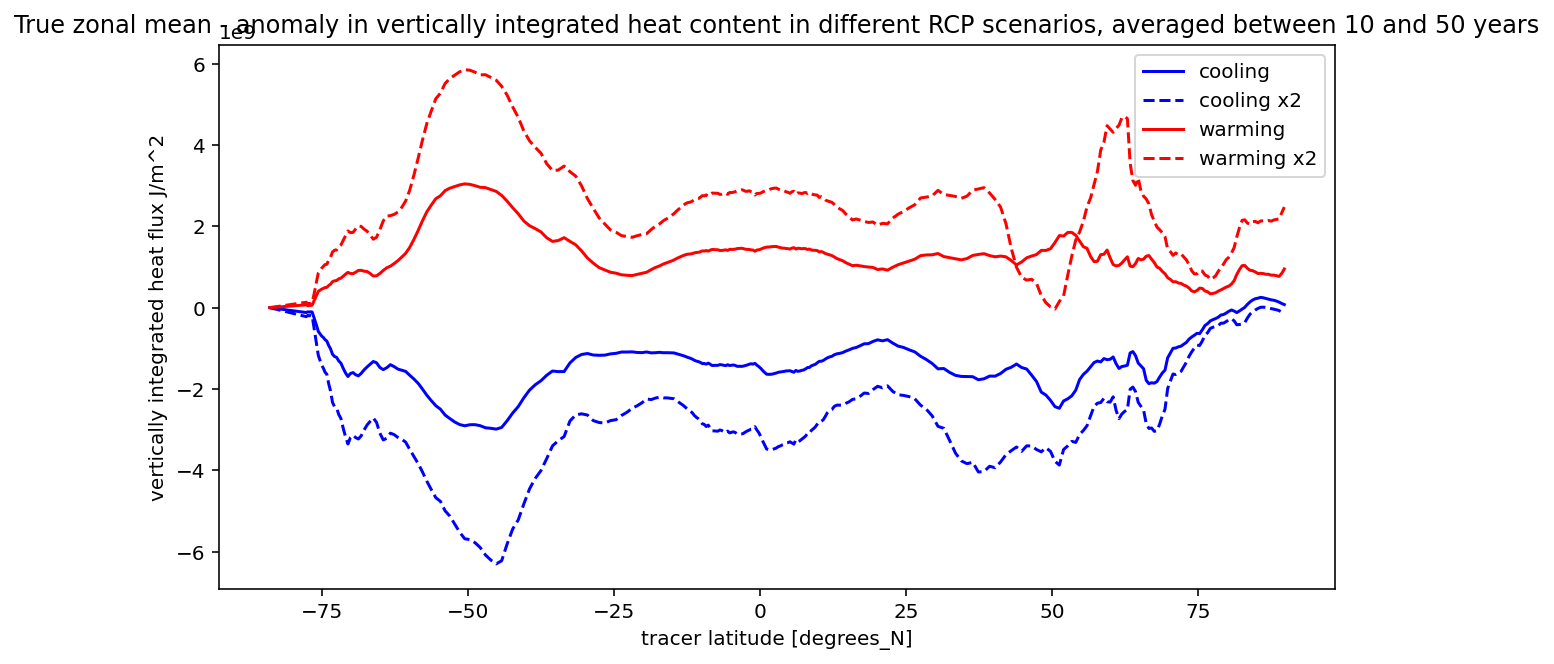

In [92]:
plt.figure(figsize=(10, 5))
coord_mean_cool.isel(year = np.arange(9,50)).mean('year').plot(label = 'cooling', color = 'b')
coord_mean_cool2x.isel(year = np.arange(9,50)).mean('year').plot(label = 'cooling x2', color = 'b', linestyle = '--')

coord_mean_warm.isel(year = np.arange(9,50)).mean('year').plot(label = 'warming', color = 'r')
coord_mean_warm2x.isel(year = np.arange(9,50)).mean('year').plot(label = 'warming x2', color = 'r', linestyle = '--')

plt.title('True zonal mean - anomaly in vertically integrated heat content in different RCP scenarios, averaged between 10 and 50 years');
plt.legend()
plt.ylabel('vertically integrated heat flux J/m^2')

In [20]:
from collections import OrderedDict
import cftime
import glob

In [21]:
exptdict = OrderedDict([
    ('Control',  {'expt':'1deg_jra55_ryf_RCPcont'}),
    ('Warming',  {'expt':'1deg_jra55_ryf_RCPwarmhumid'}),
    ('Warming x2',  {'expt':'1deg_jra55_ryf_RCPwarmhumid2x'}),
    ('Cooling',  {'expt':'1deg_jra55_ryf_RCPcoolhumid'}),
    ('Cooling x2',  {'expt':'1deg_jra55_ryf_RCPcoolhumid2x'}),

])


1deg_jra55_ryf_RCPwarmhumid
1deg_jra55_ryf_RCPwarmhumid2x
1deg_jra55_ryf_RCPcoolhumid
1deg_jra55_ryf_RCPcoolhumid2x
CPU times: user 1min 27s, sys: 5.22 s, total: 1min 32s
Wall time: 1min 25s


Text(0, 0.5, 'Temperature anomaly')

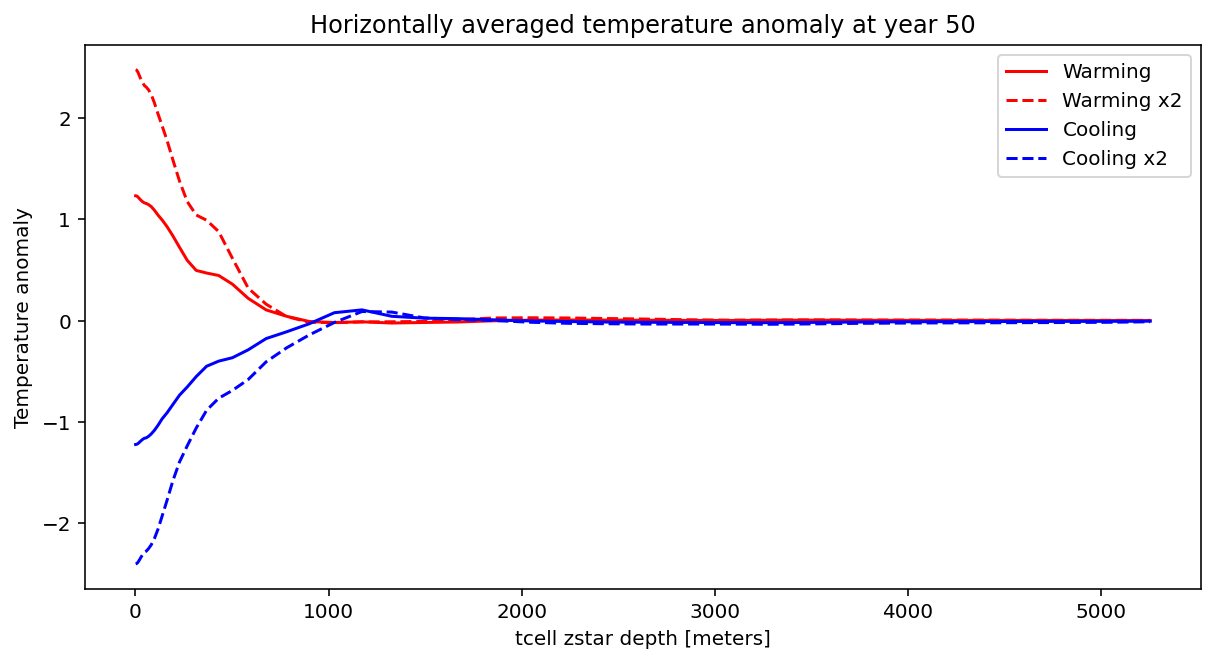

In [17]:
%%time
keys = ['Warming','Warming x2','Cooling','Cooling x2']
colors = {'Warming': 'r','Warming x2': 'r','Cooling':'b','Cooling x2':'b'}
linestyles = {'Control': '-','Warming': '-','Warming x2': '--','Cooling':'-','Cooling x2':'--'}
start_time = '2900-01-01'
plt.figure(figsize=(10,5))
temp_cont = cc.querying.getvar('1deg_jra55_ryf_RCPcont','temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    temp = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
    temp_anom = temp-temp_cont
    area_t = cc.querying.getvar(expt,'area_t',session, n=1, ncfile = 'ocean_grid.nc', start_time = '2900-01-01')#.mean('time')
    mask = temp.isel(time=0).copy()
    mask = mask/mask                 
    area = mask*area_t
    area_sum = area.sum('xt_ocean').sum('yt_ocean')
    #IPython.display.clear_output()
    var =area_t*temp_anom
    temp_hov = var.sum('xt_ocean').sum('yt_ocean').compute()
    temp_hov = temp_hov/area_sum
    temp_hov.isel(time = 49).plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
#xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend()
plt.title('Horizontally averaged temperature anomaly at year 50')
plt.ylabel('Temperature anomaly')

1deg_jra55_ryf_RCPwarmhumid
1deg_jra55_ryf_RCPwarmhumid2x
1deg_jra55_ryf_RCPcoolhumid
1deg_jra55_ryf_RCPcoolhumid2x
CPU times: user 1min 31s, sys: 4.13 s, total: 1min 35s
Wall time: 2min 48s


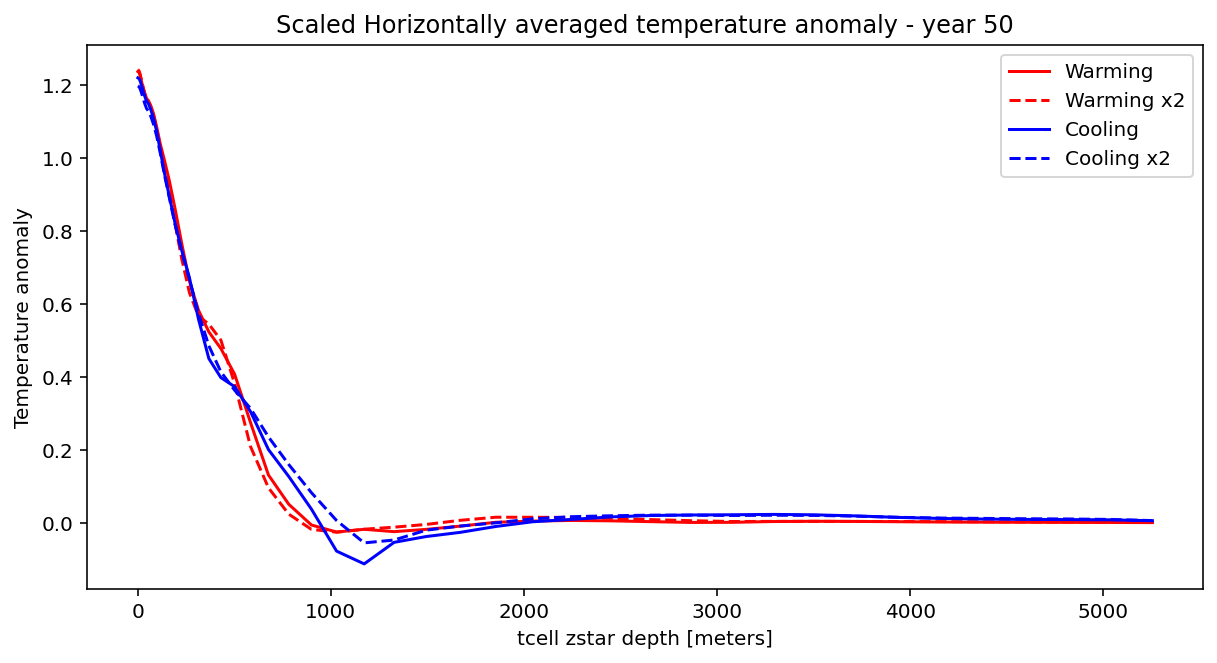

In [22]:
%%time
keys = ['Warming','Warming x2','Cooling','Cooling x2']
colors = {'Warming': 'r','Warming x2': 'r','Cooling':'b','Cooling x2':'b'}
linestyles = {'Control': '-','Warming': '-','Warming x2': '--','Cooling':'-','Cooling x2':'--'}
factor = {'Control': 1,'Warming': 1,'Warming x2': 0.5,'Cooling':-1,'Cooling x2':-0.5}
start_time = '2900-01-01'
plt.figure(figsize=(10,5))
temp_cont = cc.querying.getvar('1deg_jra55_ryf_RCPcont','temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    temp = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
    temp_anom = temp-temp_cont
    area_t = cc.querying.getvar(expt,'area_t',session, n=1, ncfile = 'ocean_grid.nc', start_time = '2900-01-01')#.mean('time')
    mask = temp.isel(time=0).copy()
    mask = mask/mask                 
    area = mask*area_t
    area_sum = area.sum('xt_ocean').sum('yt_ocean')
    #IPython.display.clear_output()
    var =area_t*temp_anom
    temp_hov = var.sum('xt_ocean').sum('yt_ocean').compute()
    temp_hov = temp_hov/area_sum*factor[ekey]
    temp_hov.isel(time = 59).plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
#xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend()
plt.title('Scaled Horizontally averaged temperature anomaly - year 50')
plt.ylabel('Temperature anomaly')
plt.savefig('figures/scaledtempvertical')

SST


In [11]:
variable_to_average = (annual_SST_warm -annual_SST_cont).isel(year= np.arange(9,59))#cc.querying.getvar(expt, 'net_sfc_heating', session)
coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
expt = '1deg_jra55_ryf_RCPwarmhumid'
variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer
yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 
dzt = cc.querying.getvar(expt, 'dzt', session, ncfile='ocean.nc')#.isel(time= np.arange(0,20)) #thickness of cells
dzt_monthly = xr.DataArray(dzt.isel(st_ocean = 0).values, dims=['year','yt_ocean','xt_ocean'],
                           coords={'year': variable_to_average.year,
                                   'yt_ocean':dzt.yt_ocean,
                                   'xt_ocean': dzt.xt_ocean})
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
dVol = (dzt_monthly*area_t) #Volume of cells

histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
coord_mean_warm = (histTVolCoordDepth/histVolCoordDepth)#.groupby('time.year').sum(dim='time')

In [12]:
variable_to_average = (annual_SST_warm2x -annual_SST_cont).isel(year= np.arange(9,59))#cc.querying.getvar(expt, 'net_sfc_heating', session)
coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
expt = '1deg_jra55_ryf_RCPwarmhumid2x'
variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer
yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 
dzt = cc.querying.getvar(expt, 'dzt', session, ncfile='ocean.nc')#.isel(time= np.arange(0,20)) #thickness of cells
dzt_monthly = xr.DataArray(dzt.isel(st_ocean = 0).values, dims=['year','yt_ocean','xt_ocean'],
                           coords={'year': variable_to_average.year,
                                   'yt_ocean':dzt.yt_ocean,
                                   'xt_ocean': dzt.xt_ocean})
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
dVol = (dzt_monthly*area_t) #Volume of cells

histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
coord_mean_warm2x = (histTVolCoordDepth/histVolCoordDepth)#.groupby('time.year').sum(dim='time')

In [13]:
variable_to_average = (annual_SST_cool -annual_SST_cont).isel(year= np.arange(9,59))#cc.querying.getvar(expt, 'net_sfc_heating', session)
coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
expt = '1deg_jra55_ryf_RCPcoolhumid'
variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer
yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 
dzt = cc.querying.getvar(expt, 'dzt', session, ncfile='ocean.nc')#.isel(time= np.arange(0,20)) #thickness of cells
dzt_monthly = xr.DataArray(dzt.isel(st_ocean = 0).values, dims=['year','yt_ocean','xt_ocean'],
                           coords={'year': variable_to_average.year,
                                   'yt_ocean':dzt.yt_ocean,
                                   'xt_ocean': dzt.xt_ocean})
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
dVol = (dzt_monthly*area_t) #Volume of cells

histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
coord_mean_cool = (histTVolCoordDepth/histVolCoordDepth)#.groupby('time.year').sum(dim='time')

In [14]:
variable_to_average = (annual_SST_cool2x -annual_SST_cont).isel(year= np.arange(9,59))#cc.querying.getvar(expt, 'net_sfc_heating', session)
coord = 'geolat_t' #can be any scalar (2D, 3D, eulerian, lagrangian etc)
expt = '1deg_jra55_ryf_RCPcoolhumid2x'
variable_as_coord = cc.querying.getvar(expt, coord, session, n=1) #might need ncfile='ocean.nc' if a tracer
yu_ocean = cc.querying.getvar(expt, 'yu_ocean', session, n=1)
bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 
dzt = cc.querying.getvar(expt, 'dzt', session, ncfile='ocean.nc')#.isel(time= np.arange(0,20)) #thickness of cells
dzt_monthly = xr.DataArray(dzt.isel(st_ocean = 0).values, dims=['year','yt_ocean','xt_ocean'],
                           coords={'year': variable_to_average.year,
                                   'yt_ocean':dzt.yt_ocean,
                                   'xt_ocean': dzt.xt_ocean})
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) #area of cells
dVol = (dzt_monthly*area_t) #Volume of cells

histVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
histTVolCoordDepth = histogram(variable_as_coord.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol*variable_to_average, dim=['yt_ocean', 'xt_ocean'])
coord_mean_cool2x = (histTVolCoordDepth/histVolCoordDepth)#.groupby('time.year').sum(dim='time')

Text(0, 0.5, 'SST')

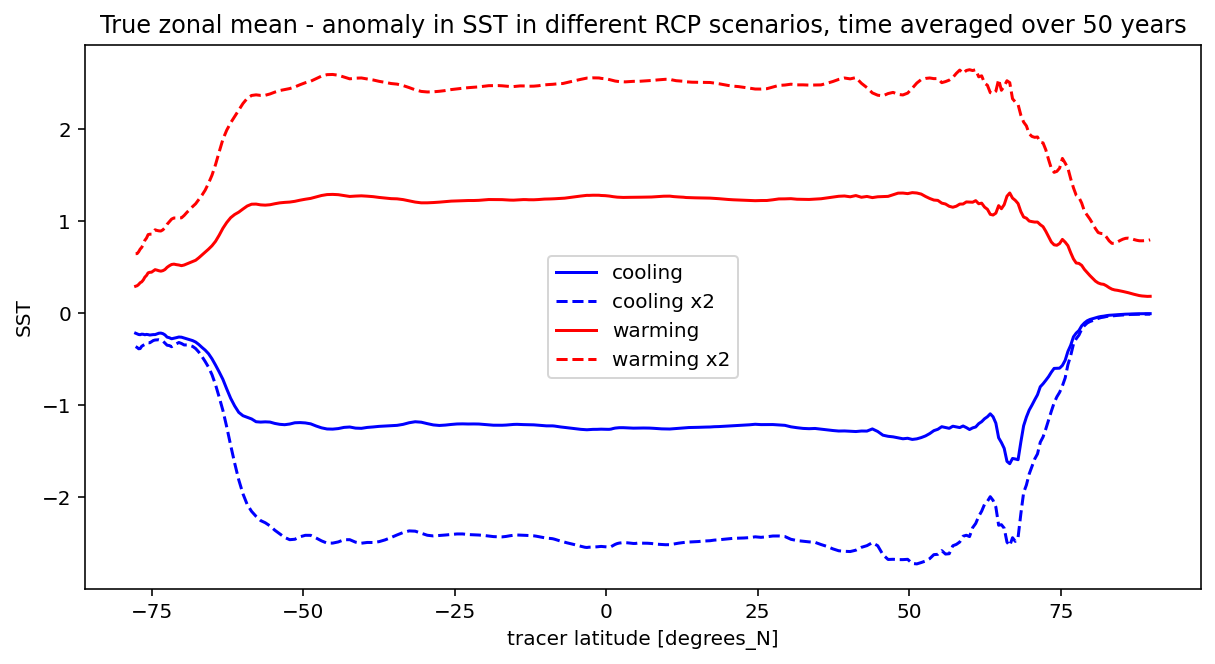

In [15]:
plt.figure(figsize=(10, 5))
coord_mean_cool.mean('year').plot(label = 'cooling', color = 'b')
coord_mean_cool2x.mean('year').plot(label = 'cooling x2', color = 'b', linestyle = '--')

coord_mean_warm.mean('year').plot(label = 'warming', color = 'r')
coord_mean_warm2x.mean('year').plot(label = 'warming x2', color = 'r', linestyle = '--')

plt.title('True zonal mean - anomaly in SST in different RCP scenarios, time averaged over 50 years');
plt.legend()
plt.ylabel('SST')